In [1]:
import json

In [2]:
with open("bible_data.json", "r") as f:
    bible_data = json.load(f)

for entry in bible_data[:3]:
    print(entry, "\n")

{'reference': 'Genesis 1', 'text': 'In the beginning, God created the heavens and the earth.\nThe earth was formless and empty. Darkness was on the surface of the deep and God’s Spirit was hovering over the surface of the waters.\nGod said, “Let there be light,” and there was light.\nGod saw the light, and saw that it was good. God divided the light from the darkness.\nGod called the light “day”, and the darkness he called “night”. There was evening and there was morning, the first day.\nGod said, “Let there be an expanse in the middle of the waters, and let it divide the waters from the waters.”\nGod made the expanse, and divided the waters which were under the expanse from the waters which were above the expanse; and it was so.\nGod called the expanse “sky”. There was evening and there was morning, a second day.\nGod said, “Let the waters under the sky be gathered together to one place, and let the dry land appear”; and it was so.\nGod called the dry land “earth”, and the gathering t

In [3]:
import sys
print(sys.executable)

C:\Users\sehaj\AppData\Local\Programs\Python\Python312\python.exe


In [5]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 131.3 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 200.7 kB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/273.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/273.6 kB 640.0 kB/s eta 0:00:01
   ---------------------------- ----------- 194.6/273.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 273.6/273.6 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sehaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sehaj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sehaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [12]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(words)

# Apply cleaning to all verses
for entry in bible_data:
    entry["cleaned_text"] = clean_text(entry["text"])

# Save cleaned data
with open("bible_cleaned.json", "w") as f:
    json.dump(bible_data, f, indent=4)

print("Text cleaning completed and saved!")


Text cleaning completed and saved!


In [15]:
#Python Code for Word Frequency Analysis

In [13]:
from collections import Counter

# Collect all words from cleaned text
all_words = []
for entry in bible_data:
    all_words.extend(entry["cleaned_text"].split())

# Count word frequencies
word_freq = Counter(all_words)

# Display top 20 most common words
print("Top 20 words:")
print(word_freq.most_common(20))

Top 20 words:
[('said', 157), ('god', 151), ('yahweh', 84), ('father', 68), ('man', 62), ('son', 61), ('jesus', 59), ('day', 53), ('one', 50), ('come', 47), ('water', 44), ('let', 43), ('shall', 43), ('moses', 42), ('thing', 40), ('became', 37), ('earth', 36), ('made', 34), ('woman', 34), ('child', 34)]


In [14]:
#Python Code to Generate a Word Cloud

In [17]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 465.5 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

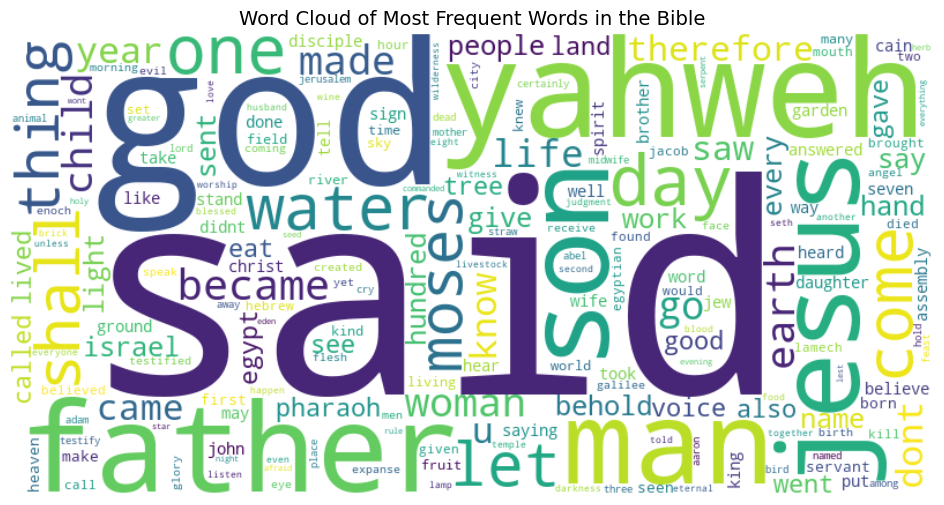

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words in the Bible", fontsize=14)
plt.show()

In [20]:
#Python Code for Book-Wise Word Frequency

In [22]:
import pandas as pd

# Dictionary to store word frequencies by book
book_word_freq = {}

# Loop through each book
for book in set([entry["book"] for entry in bible_data]):
    book_words = []
    for entry in bible_data:
        if entry["book"] == book:
            book_words.extend(entry["cleaned_text"].split())
    
    # Count word frequencies
    book_word_freq[book] = Counter(book_words).most_common(10)

# Convert to DataFrame for better visualization
df = pd.DataFrame.from_dict(book_word_freq, orient="index")
df.columns = [f"Word {i+1}" for i in range(10)]

# Show the frequency table
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Genesis,"(god, 65)","(said, 36)","(man, 33)","(became, 33)","(father, 33)","(day, 32)","(yahweh, 32)","(year, 29)","(earth, 28)","(hundred, 24)"
John,"(said, 64)","(jesus, 54)","(come, 33)","(god, 32)","(son, 30)","(one, 25)","(father, 25)","(water, 24)","(dont, 21)","(life, 20)"
Psalms,"(yahweh, 21)","(shall, 8)","(let, 6)","(god, 6)","(wicked, 5)","(stand, 5)","(selah, 5)","(way, 4)","(king, 4)","(take, 4)"
Exodus,"(said, 56)","(god, 40)","(moses, 37)","(yahweh, 31)","(go, 28)","(child, 26)","(shall, 26)","(israel, 24)","(people, 24)","(pharaoh, 24)"
Revelation,"(thing, 14)","(seven, 13)","(assembly, 13)","(say, 12)","(like, 11)","(work, 9)","(god, 8)","(know, 7)","(give, 7)","(angel, 6)"


In [23]:
#Python Code for Visualization

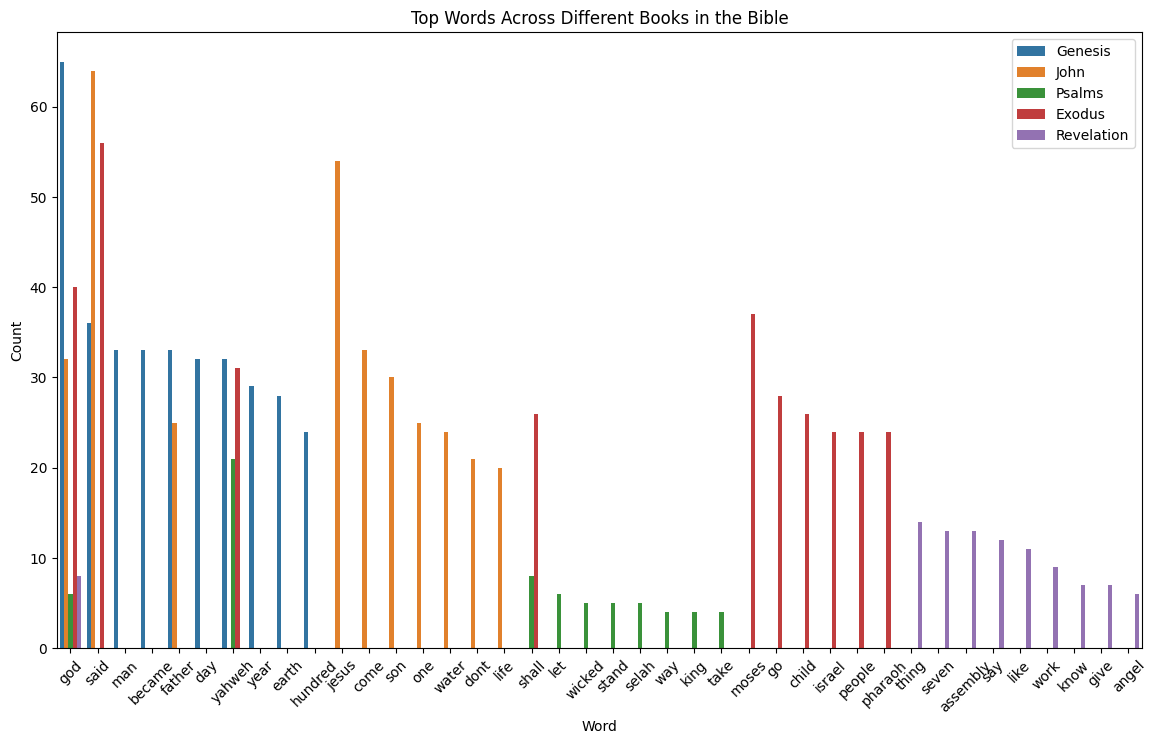

In [24]:
import seaborn as sns

# Prepare data for visualization
plot_data = []
for book, words in book_word_freq.items():
    for word, count in words:
        plot_data.append({"Book": book, "Word": word, "Count": count})

plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Word", y="Count", hue="Book", data=plot_df)
plt.title("Top Words Across Different Books in the Bible")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

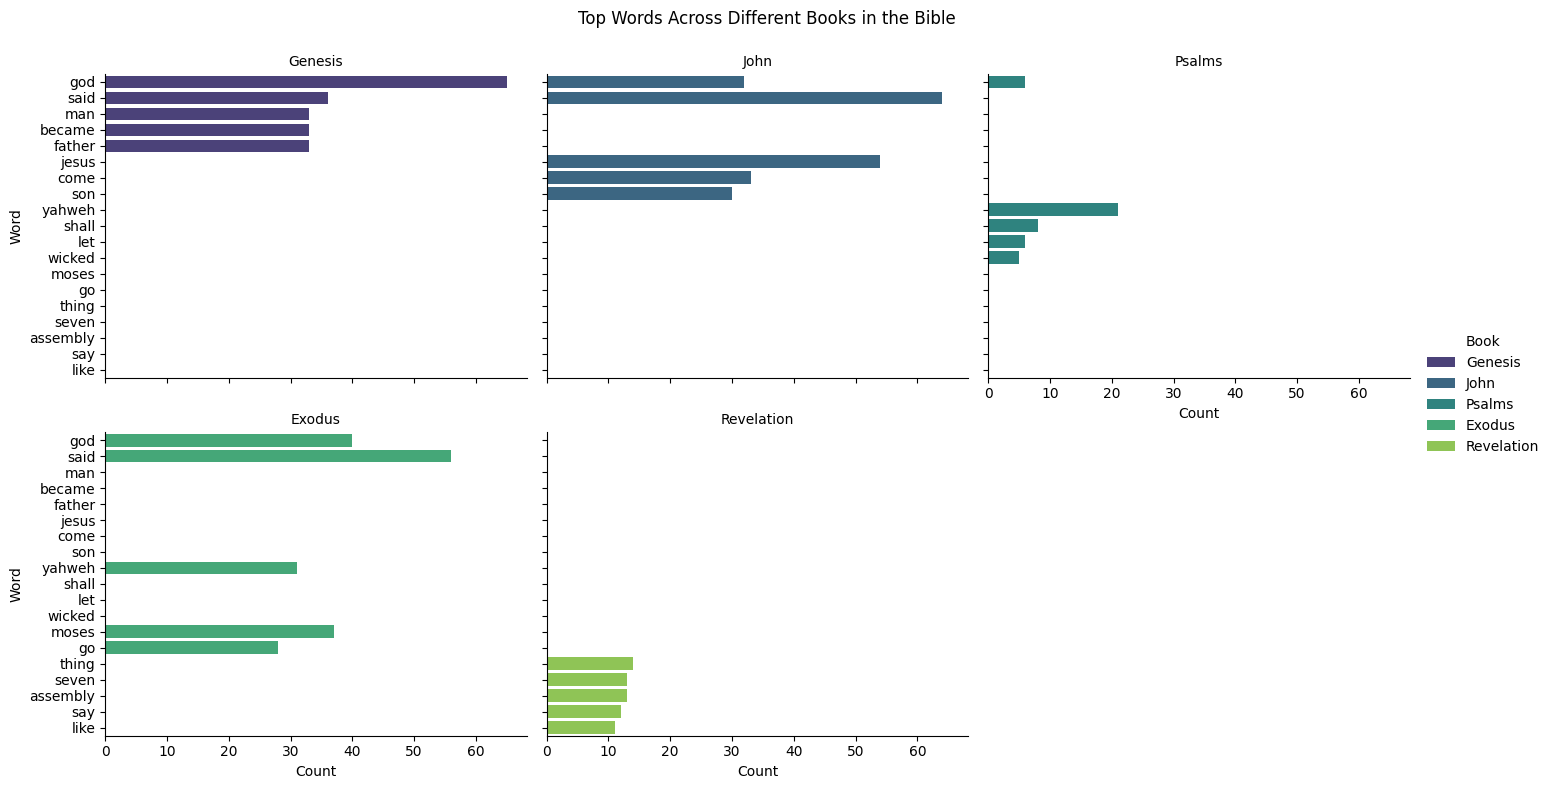

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert book_word_freq to a DataFrame
plot_data = []
top_n = 5  # Number of top words per book

for book, words in book_word_freq.items():
    for word, count in words[:top_n]:  # Take only top N words per book
        plot_data.append({"Book": book, "Word": word, "Count": count})

plot_df = pd.DataFrame(plot_data)

# Create a FacetGrid for better visualization
g = sns.catplot(
    data=plot_df, 
    x="Count", 
    y="Word", 
    hue="Book", 
    kind="bar", 
    col="Book", 
    col_wrap=3,  # Adjust the number of columns for better layout
    height=4, 
    aspect=1.2, 
    palette="viridis"
)

g.set_titles("{col_name}")  # Set subplot titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top Words Across Different Books in the Bible")  # Global title
plt.show()